
# PyTorch에서 데이터 불러오기
PyTorch는 인공신경망을 만드는데 필요한 다양한 기본 요소를 간단하고 직관적이며
안정적인 API로 제공합니다. PyTorch는 공용 데이터셋을 쉽게 사용할 수 있도록
도와주는 패키지를 포함하고 있습니다.

## 개요
PyTorch 데이터 불러오기 기능의 핵심은
[torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)_
클래스입니다. 데이터를 파이썬 iterable로써 접근할 수 있게 해주는 클래스입니다.
또한, [torch.utils.data.Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)_
클래스를 통해 PyTorch에 내장된 다양한 고품질 데이터셋을 이용하실 수 있습니다.


개별 데이터셋은 아래 패키지에서 확인하실 수 있으며, 데이터셋은 계속해서 추가될 예정입니다.

* [torchvision](https://pytorch.org/vision/stable/datasets.html)_
* [torchaudio](https://pytorch.org/audio/stable/datasets.html)_
* [torchtext](https://pytorch.org/text/stable/datasets.html)_


이번 레시피에서는 ``torchaudio.datasets.YESNO`` 데이터셋을 살펴보면서,
PyTorch ``Dataset`` 에서 PyTorch ``DataLoader`` 로 데이터를 효과적이고 효율적으로
불러오는 방법을 살펴보겠습니다.


## 초기 설정(Setup)
시작하기 전에, 데이터셋이 포함된 ``torchaudio`` 패키지를 설치합니다.



In [1]:
!pip install torchaudio

## 단계(Steps)

1. 데이터를 불러오는데 필요한 라이브러리 import하기
2. 데이터 접근하기
3. 데이터 불러오기
4. 데이터 순회하기
5. [선택 사항] 데이터 시각화하기


## 1. 데이터를 불러오는데 필요한 라이브러리 import하기

이번 레시피는 ``torch`` 와 ``torchaudio`` 를 사용합니다. 다른 내장 데이터셋이
필요하다면 ``torchvision`` 혹은 ``torchtext`` 를 설치해서 사용해도 됩니다.




In [2]:
import torch
import torchaudio

## 2. 데이터에 접근하기

``torchaudio`` 의 YesNo 데이터셋은 한 사람이 히브리어로 yes 혹은
no를 녹음한 오디오 클립 60개로 구성되어 있습니다. 오디오 클립 각각의 길이는 단어 8개입니다.
( [더 알아보기](https://www.openslr.org/1/)_ ).

``torchaudio.datasets.YESNO`` 클래스를 사용하여 YesNo 데이터셋을 생성합니다.



In [4]:
torchaudio.datasets.YESNO(
     root='./',
     url='http://www.openslr.org/resources/1/waves_yesno.tar.gz',
     folder_in_archive='waves_yesno',
     download=True)

100%|██████████| 4.49M/4.49M [00:00<00:00, 4.84MB/s]


각각의 데이터 항목 (item)은 튜플 형태 (waveform: 파형, sample_rate: 샘플 속도, labels: 라벨)를 갖습니다.

YesNo 데이터셋을 불러올 때 ``root`` 매개변수는 꼭 지정해주셔야 합니다. ``root`` 는
학습(training) 및 테스트(testing) 데이터셋이 존재하는 위치를 가르켜야 합니다.
그 외의 매개변수는 선택 사항이며, 위 예시에서 기본값을 확인하실 있습니다. 아래와
같은 매개변수도 사용 가능합니다.

* ``download``: 참(True)인 경우, 데이터셋 파일을 인터넷에서 다운받고 root 폴더에 저장합니다. 파일이 이미 존재하면 다시 다운받지 않습니다.

이제 YesNo 데이터를 확인해봅시다:



In [5]:
# YesNo 안에 각각의 데이터 항목은 튜플 형태 (파형, 샘플 속도, 라벨)를 가지며,
# 이때 labels는 0(no)과 1(yes)을 담은 리스트 형태로 되어 있습니다.
yesno_data = torchaudio.datasets.YESNO('./', download=True)

# 실제 데이터에 접근해서 yesno_data의 형태를 확인합니다. 세 번째 항목을 예시로 살펴봅니다.
n = 3
waveform, sample_rate, labels = yesno_data[n]
print("Waveform: {}\nSample rate: {}\nLabels: {}".format(waveform, sample_rate, labels))

Waveform: tensor([[ 3.0518e-05,  6.1035e-05,  3.0518e-05,  ..., -1.8311e-04,
          4.2725e-04,  6.7139e-04]])
Sample rate: 8000
Labels: [0, 0, 1, 0, 0, 0, 1, 0]


실제 상황에서는 데이터를 "학습(training)" 데이터셋과 "테스트(testing)" 데이터셋으로 나누는 것이
권장됩니다. 모델의 성능을 제대로 평가하려면 학습에 쓰이지 않은 out-of-sample
데이터를 이용해야 하기 때문입니다.

## 3. 데이터 불러오기

데이터셋에 성공적으로 접근했으니, 이제 데이터셋을 ``torch.utils.data.DataLoader`` 로 넘겨줍니다.
``DataLoader`` 는 데이터셋을 sampler와 조합시켜 데이터셋을 순회할 수 있는 iterable을 만들어줍니다.




In [6]:
data_loader = torch.utils.data.DataLoader(yesno_data, batch_size=1, shuffle=True)

## 4. 데이터 순회하기

이제 ``data_loader`` 를 이용해서 데이터를 순회할 수 있습니다. 모델을 학습하려면 이처럼
데이터를 순회할 수 있어야 합니다. 아래 예시를 보시면 ``data_loader`` 안에 있는 각각의
데이터 항목이 파형, 샘플 속도, 라벨을 담은 텐서로 바뀌었음을 확인할 수 있습니다.




In [7]:
for data in data_loader:
    print("Data: ", data)
    print("Waveform: {}\nSample rate: {}\nLabels: {}".format(data[0], data[1], data[2]))
    break

Data:  [tensor([[[3.0518e-05, 6.1035e-05, 3.0518e-05,  ..., 5.8594e-03,
          3.5400e-03, 3.3569e-04]]]), tensor([8000]), [tensor([0]), tensor([1]), tensor([0]), tensor([0]), tensor([1]), tensor([0]), tensor([1]), tensor([0])]]
Waveform: tensor([[[3.0518e-05, 6.1035e-05, 3.0518e-05,  ..., 5.8594e-03,
          3.5400e-03, 3.3569e-04]]])
Sample rate: tensor([8000])
Labels: [tensor([0]), tensor([1]), tensor([0]), tensor([0]), tensor([1]), tensor([0]), tensor([1]), tensor([0])]


## 5. [선택 사항] 데이터 시각화하기

``DataLoader`` 의 데이터를 시각화해서 더 자세히 확인해보실 수 있습니다.




[[3.0517578e-05 6.1035156e-05 3.0517578e-05 ... 5.8593750e-03
  3.5400391e-03 3.3569336e-04]]


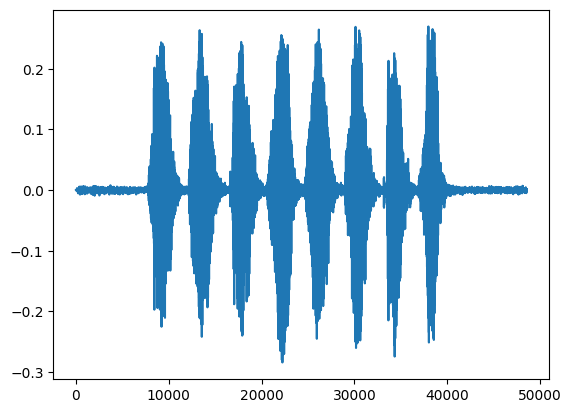

In [10]:
import matplotlib.pyplot as plt

print(data[0][0].numpy())

plt.figure()
plt.plot(waveform.t().numpy());


# Pytorch를 사용해 신경망 정의하기
딥러닝은 인공신경망(models)을 사용하며 이것은 상호연결된 집단의 많은 계층으로 구성된 계산 시스템입니다.
데이터가 이 상호연결된 집단을 통과하면서, 신경망은 입력을 출력으로 바꾸기 위해 요구된 계산 방법에 어떻게 근접하는 지를 배울 수 있습니다.
PyTorch에서, 신경망은 ``torch.nn`` 패키지를 사용해 구성할 수 있습니다.

## 소개
PyTorch는 ``torch.nn`` 을 포함하여 신경망을 만들고 훈련시키는 것을 도울 수 있도록 섬세하게 만들어진 모듈과 클래스들을 제공합니다.
``nn.Module`` 은 계층, 그리고 ``output`` 을 반환하는 ``forward(input)`` 메소드를 포함하고 있습니다.

이 레시피에서, [MNIST dataset](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist)_ 을 사용하여 신경망을 정의하기 위해 ``torch.nn`` 을 사용할 예정입니다.


## 단계

1. 데이터를 가져오기 위해 필요한 라이브러리들 불러오기
2. 신경망을 정의하고 초기화하기
3. 데이터가 모델을 어떻게 지나갈 지 구체화하기
4. [선택사항] 데이터를 모델에 적용해 테스트하기

### 1. 데이터를 가져오기 위해 필요한 라이브러리들 불러오기

이 레시피에서, ``torch`` 과 이것의 하위 모듈인 ``torch.nn`` , ``torch.nn.functional`` 을 사용합니다.




In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### 2. 신경망을 정의하고 초기화하기

이미지를 인식하는 신경망을 만들겁니다. PyTorch에서 만들어진 합성곱(convolution)이라고 불리는 방법을 사용하겠습니다.
합성곱은 커널이나 작은 행렬(matrix)를 통해 가중치를 부여한 이미지의 각 요소를 주변 값과 더합니다.
그리고 이것은 입력된 이미지의 특징(모서리 감지, 선명함, 흐릿함 등과 같은)을 추출하는 데 도움을 줍니다.

모델의 ``Net`` 클래스를 정의하기 위해 2가지가 필요합니다.
첫번째는 ``nn.Module`` 을 참고하는 ``__init__`` 함수를 작성하는 것입니다.
이 함수는 신경망에서 fully connected layers를 만드는 것에 사용됩니다.

합성곱을 사용해, 1개의 입력 이미지 채널을 가지고
목표인 0부터 9까지 숫자를 대표하는 10개의 라벨과 되응되 값을 출력하는 모델을 정의하겠습니다.
이 알고리즘은 만드는 사람에 달렸지만, 기본적인 MNIST 알고리즘을 따르도록 하겠습니다.




In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # 첫번째 2D 합성곱 계층
        # 1개의 입력 채널(이미지)을 받아들이고, 사각 커널 사이즈가 3인 32개의 합성곱 특징들을 출력합니다.
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        # 두번째 2D 합성곱 계층
        # 32개의 입력 계층을 받아들이고, 사각 커널 사이즈가 3인 64개의 합성곱 특징을 출력
        self.conv2 = nn.Conv2d(32, 64, 3, 1)

        # 인접한 픽셀들은 입력 확률에 따라 모두 0 값을 가지거나 혹은 모두 유효한 값이 되도록 만듭니다.
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)

        # 첫번째 fully connected layer
        self.fc1 = nn.Linear(9216, 128)
        # 10개의 라벨을 출력하는 두번째 fully connected layer
        self.fc2 = nn.Linear(128, 10)

my_nn = Net()
print(my_nn)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


신경망을 정의하는 것을 마쳤습니다. 이제 어떻게 이것을 지나갈 지 정의해야 합니다.

### 3. 데이터가 모델을 어떻게 지나갈 지 구체화하기

PyTorch를 사용해 모델을 생성할 때, 계산 그래프(즉, 신경망)에 데이터를 지나가게 하는 ``forward`` 함수를 정의해야 합니다.
이것은 feed-forward 알고리즘을 나타냅니다.

``forward`` 함수에서 어떠한 Tensor 연산자도 사용 가능합니다.




In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    # x는 데이터를 나타냄
    def forward(self, x):
        # 데이터 가 conv1을 지남
        x = self.conv1(x)
        # x를 ReLU 활성함수(rectified-linear activation function)에 대입
        x = F.relu(x)

        x = self.conv2(x)
        x = F.relu(x)

        # max pooling 실행
        x = F.max_pool2d(x, 2)
        # 데이터가 dropout1을 지나감
        x = self.dropout1(x)
        # start_dim=1으로 x를 압축
        x = torch.flatten(x, 1)
        # 데이터가 fc1을 지나감
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)

        # x에 softmax 적용
        output = F.log_softmax(x, dim=1)
        return output

### 4. [선택사항] 데이터를 모델에 적용해 테스트하기

원하는 출력값을 받을 수 있는 지 확인하기 위해, 무작위의 데이터를 모델에 통과시켜 시험해봅시다.




In [18]:
# 임의의 28x28 이미지
random_data = torch.rand((1,1,28,28))

my_nn = Net()
result = my_nn(random_data)
print(result)

# 결과 tensor의 각 숫자는 임의의 tensor와 연관된 라벨이 예측한 값과 같다는 것을 나타냅니다.

tensor([[-2.2519, -2.2528, -2.3429, -2.4151, -2.3187, -2.1561, -2.3419, -2.4055,
         -2.2143, -2.3589]], grad_fn=<LogSoftmaxBackward0>)



# PyTorch에서 state_dict란 무엇인가요?
PyTorch에서 ``torch.nn.Module`` 모델의 학습 가능한
매개변수(예. 가중치와 편향)들은 모델의 매개변수에 포함되어 있습니다.
(model.parameters()로 접근합니다)
``state_dict`` 는 간단히 말해 각 계층을 매개변수 텐서로 매핑되는
Python 사전(dict) 객체입니다.

## 개요
``state_dict`` 는 PyTorch에서 모델을 저장하거나 불러오는 데 관심이
있다면 필수적인 항목입니다.
``state_dict`` 객체는 Python 사전이기 때문에 쉽게 저장, 업데이트,
변경 및 복원할 수 있으며, 이는 PyTorch 모델과 옵티마이저에 엄청난
모듈성(modularity)을 제공합니다.
이 때, 학습 가능한 매개변수를 갖는 계층(합성곱 계층, 선형 계층 등)
및 등록된 버퍼들(batchnorm의 running_mean)만 모델의 ``state_dict``
 항목을 가진다는 점에 유의하시기 바랍니다. 옵티마이저 객체
( ``torch.optim`` ) 또한 옵티마이저의 상태 뿐만 아니라 사용된
하이퍼 매개변수 (Hyperparameter) 정보가 포함된 ``state_dict`` 을
갖습니다.
레시피에서 ``state_dict`` 이 간단한 모델에서 어떻게 사용되는지
살펴보겠습니다.

## 단계(Steps)

1. 데이터를 불러올 때 필요한 모든 라이브러리 불러오기
2. 신경망을 구성하고 초기화하기
3. 옵티마이저 초기화하기
4. 모델과 옵티마이저의 ``state_dict`` 접근하기

### 1. 데이터를 불러올 때 필요한 모든 라이브러리 불러오기

이 레시피에서는 ``torch`` 와 하위 패키지인 ``torch.nn`` 과 ``torch.optim`` 을
사용하겠습니다.




In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

### 2. 신경망을 구성하고 초기화하기

예시를 보이기 위해, 이미지를 학습하는 신경망을 만들어보겠습니다.



In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### 3. 옵티마이저 초기화하기

모멘텀(momentum)을 갖는 SGD를 사용하겠습니다.




In [21]:
optimizer = optim.SGD(net.parameters(), lr=.001, momentum=.9)

### 4. 모델과 옵티마이저의 ``state_dict`` 접근하기

이제 모델과 옵티마이저를 구성했으므로 각각의 ``state_dict`` 속성에
저장되어 있는 항목을 확인할 수 있습니다.




In [22]:
# 모델의 state_dict 출력
print("Model's state_dict:")
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())

# 이 정보는 향후 모델 및 옵티마이저를 저장하고 불러오는 것과 관련이 있습니다.

Model's state_dict:
conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])



# PyTorch에서 추론(inference)을 위해 모델 저장하기 & 불러오기

PyTorch에서는 추론(inference)을 위해 모델을 저장하고 불러오는데 2가지 접근법이
있습니다. 첫번째는 ``state_dict`` 를 저장하고 불러오는 것이고, 두번째는 전체
모델을 저장하는 것입니다.

## 개요
torch.save() 함수를 사용하여 모델의 ``state_dict`` 를 저장하면 이후에 모델을
불러올 때 유연함을 크게 살릴 수 있습니다. 학습된 모델의 매개변수(parameter)만을
저장하면되므로 모델 저장 시에 권장하는 방법입니다. 모델 전체를 저장하고 불러올
때에는 Python의 [pickle](https://docs.python.org/3/library/pickle.html)_ 모듈을
사용하여 전체 모듈을 저장합니다. 이 방식은 직관적인 문법을 사용하며 코드의 양도
적습니다. 이 방식의 단점은 직렬화(serialized)된 데이터가 모델을 저장할 때 사용한
특정 클래스 및 디렉토리 구조에 종속(bind)된다는 것입니다. 그 이유는 pickle이
모델 클래스 자체를 저장하지 않기 때문입니다. 오히려 불러올 때 사용되는 클래스가
포함된 파일의 경로를 저장합니다. 이 때문에 작성한 코드가 다른 프로젝트에서
사용되거나 리팩토링을 거치는 등의 과정에서 동작하지 않을 수 있습니다. 이 레시피에서는
추론을 위해 모델을 저장하고 불러오는 두 가지 방법 모두를 살펴보겠습니다.


## 단계(Steps)

1. 데이터 불러올 때 필요한 라이브러리들 불러오기
2. 신경망을 구성하고 초기화하기
3. 옵티마이저 초기화하기
4. ``state_dict`` 을 통해 모델을 저장하고 불러오기
5. 전체 모델을 저장하고 불러오기

### 1. 데이터 불러올 때 필요한 라이브러리들 불러오기

이 레시피에서는 ``torch`` 와 여기 포함된 ``torch.nn`` 과 ``torch.optim`` 을
사용하겠습니다.




In [23]:
import torch
import torch.nn as nn
import torch.optim as optim

### 2. 신경망을 구성하고 초기화하기

예를 들기 위해, 이미지를 학습하는 신경망을 만들어보겠습니다.


In [24]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### 3. 옵티마이저 초기화하기

모멘텀(momentum)을 갖는 SGD를 사용하겠습니다.




In [25]:
optimizer = optim.SGD(net.parameters(), lr=.001, momentum=.9)

### 4. ``state_dict`` 을 통해 모델을 저장하고 불러오기

이제 ``state_dict`` 만 사용하여 모델을 저장하고 불러와보겠습니다.




In [26]:
# 경로 지정
PATH = "state_dict_model.pt"

# 저장하기
torch.save(net.state_dict(), PATH)

# 불러오기
model = Net()
model.load_state_dict(torch.load(PATH))
model.eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

PyTorch에서는 모델을 저장할 때 ``.pt`` 또는 ``.pth`` 확장자를 사용하는 것이
일반적인 규칙입니다.

``load_state_dict()`` 함수는 저장된 객체의 경로가 아닌, 사전 객체를 사용합니다.
즉, 저장된 state_dict를 ``load_state_dict()`` 함수에 전달하기 전에 반드시
역직렬화(deserialize)를 해야 합니다. 예를 들어, ``model.load_state_dict(PATH)``
와 같이 사용할 수 없습니다.

또한, 추론을 실행하기 전에 ``model.eval()`` 을 호출하여 드롭아웃(dropout)과
배치 정규화 층(batch normalization layers)을 평가(evaluation) 모드로 바꿔야한다는
것을 기억하세요. 이것을 빼먹으면 일관성 없는 추론 결과를 얻게 됩니다.



# PyTorch에서 일반적인 체크포인트(checkpoint) 저장하기 & 불러오기
추론(inference) 또는 학습(training)의 재개를 위해 체크포인트(checkpoint) 모델을
저장하고 불러오는 것은 마지막으로 중단했던 부분을 선택하는데 도움을 줄 수 있습니다.
체크포인트를 저장할 때는 단순히 모델의 state_dict 이상의 것을 저장해야 합니다.
모델 학습 중에 갱신되는 버퍼와 매개변수들을 포함하는 옵티마이저(Optimizer)의
state_dict를 함께 저장하는 것이 중요합니다. 이 외에도 중단 시점의 에포크(epoch),
마지막으로 기록된 학습 오차(training loss), 외부 ``torch.nn.Embedding`` 계층 등,
알고리즘에 따라 저장하고 싶은 항목들이 있을 것입니다.

## 개요
여러 체크포인트들을 저장하기 위해서는 사전(dictionary)에 체크포인트들을 구성하고
``torch.save()`` 를 사용하여 사전을 직렬화(serialize)해야 합니다. 일반적인
PyTorch에서는 이러한 여러 체크포인트들을 저장할 때 ``.tar`` 확장자를 사용하는 것이
일반적인 규칙입니다. 항목들을 불러올 때에는, 먼저 모델과 옵티마이저를 초기화하고,
torch.load()를 사용하여 사전을 불러옵니다. 이후 원하는대로 저장한 항목들을 사전에
조회하여 접근할 수 있습니다.

이 레시피에서는 여러 체크포인트들을 어떻게 저장하고 불러오는지 살펴보겠습니다.


## 단계(Steps)

1. 데이터 불러올 때 필요한 라이브러리들 불러오기
2. 신경망을 구성하고 초기화하기
3. 옵티마이저 초기화하기
4. 일반적인 체크포인트 저장하기
5. 일반적인 체크포인트 불러오기

### 1. 데이터 불러올 때 필요한 라이브러리들 불러오기

이 레시피에서는 ``torch`` 와 여기 포함된 ``torch.nn`` 와 ``torch.optim`` 을
사용하겠습니다.




In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

### 2. 신경망을 구성하고 초기화하기

예를 들어, 이미지를 학습하는 신경망을 만들어보겠습니다.

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### 3. 옵티마이저 초기화하기

모멘텀(momentum)을 갖는 SGD를 사용하겠습니다.




In [3]:
optimizer = optim.SGD(net.parameters(), lr=.001, momentum=.9)

### 4. 일반적인 체크포인트 저장하기

관련된 모든 정보들을 모아서 사전을 구성합니다.




In [5]:
# 추가 정보
EPOCH = 5
PATH = "model.pt"
LOSS = 0.4

torch.save({
    'epoch':EPOCH,
    'model_state_dict':net.state_dict(),
    'optimizer_state_dict':optimizer.state_dict(),
    'loss':LOSS,
    },PATH)

### 5. 일반적인 체크포인트 불러오기

먼저 모델과 옵티마이저를 초기화한 뒤, 사전을 불러오는 것을 기억하십시오.




In [6]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=.001, momentum=.9)

checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint["model_state_dict"])
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
epoch = checkpoint["epoch"]
loss = checkpoint["loss"]

model.eval()
# - 또는 -
model.train()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

추론(inference)을 실행하기 전에 ``model.eval()`` 을 호출하여 드롭아웃(dropout)과
배치 정규화 층(batch normalization layer)을 평가(evaluation) 모드로 바꿔야한다는
것을 기억하세요. 이것을 빼먹으면 일관성 없는 추론 결과를 얻게 됩니다.

만약 학습을 계속하길 원한다면 ``model.train()`` 을 호출하여 이 층(layer)들이
학습 모드인지 확인(ensure)하세요.

축하합니다! 지금까지 PyTorch에서 추론 또는 학습 재개를 위해 일반적인 체크포인트를
저장하고 불러왔습니다.



# PyTorch에서 여러 모델을 하나의 파일에 저장하기 & 불러오기
여러 모델을 저장하고 불러오는 것은 이전에 학습했던 모델들을 재사용하는데 도움이 됩니다.

## 개요
GAN이나 시퀀스-투-시퀀스(sequence-to-sequence model), 앙상블 모델(ensemble of models)과
같이 여러 ``torch.nn.Modules`` 로 구성된 모델을 저장할 때는 각 모델의 state_dict와
해당 옵티마이저(optimizer)의 사전을 저장해야 합니다. 또한, 학습 학습을 재개하는데
필요한 다른 항목들을 사전에 추가할 수 있습니다. 모델들을 불러올 때에는, 먼저
모델들과 옵티마이저를 초기화하고, ``torch.load()`` 를 사용하여 사전을 불러옵니다.
이후 원하는대로 저장한 항목들을 사전에 조회하여 접근할 수 있습니다.
이 레시피에서는 PyTorch를 사용하여 여러 모델들을 하나의 파일에 어떻게 저장하고
불러오는지 살펴보겠습니다.


## 단계(Steps)

1. 데이터 불러올 때 필요한 라이브러리들 불러오기
2. 신경망을 구성하고 초기화하기
3. 옵티마이저 초기화하기
4. 여러 모델들 저장하기
5. 여러 모델들 불러오기

### 1. 데이터 불러올 때 필요한 라이브러리들 불러오기

이 레시피에서는 ``torch`` 와 여기 포함된 ``torch.nn`` 와 ``torch.optim`` 을
사용하겠습니다.




In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

### 2. 신경망을 구성하고 초기화하기



In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

netA = Net()
netB = Net()

### 3. 옵티마이저 초기화하기

생성한 모델들 각각에 모멘텀(momentum)을 갖는 SGD를 사용하겠습니다.




In [8]:
optimizerA = optim.SGD(netA.parameters(), lr=.001, momentum=.9)
optimizerB = optim.SGD(netB.parameters(), lr=.001, momentum=.9)

### 4. 여러 모델들 저장하기

관련된 모든 정보들을 모아서 사전을 구성합니다.




In [9]:
# 저장할 경로 지정
PATH = "model.pt"

torch.save({
    'modelA_state_dict':netA.state_dict(),
    'modelB_state_dict':netB.state_dict(),
    'optimizerA_state_dict':optimizerA.state_dict(),
    'optimizerB_state_dict':optimizerB.state_dict(),
}, PATH)

### 5. 여러 모델들 불러오기

먼저 모델과 옵티마이저를 초기화한 뒤, 사전을 불러오는 것을 기억하십시오.




In [10]:
modelA = Net()
modelB = Net()
optimModelA = optim.SGD(modelA.parameters(), lr=.001, momentum=.9)
optimModelB = optim.SGD(modelB.parameters(), lr=.001, momentum=.9)

checkpoint = torch.load(PATH)
modelA.load_state_dict(checkpoint['modelA_state_dict'])
modelB.load_state_dict(checkpoint['modelB_state_dict'])
optimModelA.load_state_dict(checkpoint['optimizerA_state_dict'])
optimModelB.load_state_dict(checkpoint['optimizerB_state_dict'])

modelA.eval()
modelB.eval()
# - 또는 -
modelA.train()
modelB.train()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

추론(inference)을 실행하기 전에 ``model.eval()`` 을 호출하여 드롭아웃(dropout)과
배치 정규화 층(batch normalization layer)을 평가(evaluation) 모드로 바꿔야한다는
것을 기억하세요. 이것을 빼먹으면 일관성 없는 추론 결과를 얻게 됩니다.

만약 학습을 계속하길 원한다면 ``model.train()`` 을 호출하여 이 층(layer)들이
학습 모드인지 확인(ensure)하세요.

축하합니다! 지금까지 PyTorch에서 여러 모델들을 저장하고 불러왔습니다.




# PyTorch에서 다른 모델의 매개변수를 사용하여 빠르게 모델 시작하기(warmstart)
모델을 부분적으로 불러오거나, 혹은 부분적인 모델을 불러오는 것은
학습 전이(Transfer learning)나 복잡한 모델을 새로 학습할 때 자주 접하는
시나리오입니다. 학습된 매개변수를 활용하면 학습 과정을 빠르게
시작(warmstart)할 수 있으며, 그러면 모델을 처음부터 훈련시킬 때보다 훨씬
일찍 수렴하리라 기대할 수 있습니다. 이는 활용할 수 있는 매개변수가 얼마 안
될 때에도 마찬가지입니다.

## 도입
일부 키가 누락된 부분적인 ``state_dict`` 를 불러올 때든, 아니면 결과를
저장할 모델보다 키가 많은 ``state_dict`` 를 불러올 때든,
``load_state_dict()`` 함수의 인자인 strict 를 False 로 두면 매치되지
않는 키를 무시하게끔 할 수 있습니다. 이 레시피에서는 다른 모델의
매개변수를 사용하여 모델을 빠르게 시작하는 실험을 진행해 보려 합니다.
   


## 단계

1. 데이터를 불러오는데 필요한 모든 라이브러리를 import 합니다
2. 신경망 A와 B를 정의하고 초기화합니다
3. 모델 A를 저장합니다
4. 모델 B로 모델을 불러옵니다

### 1. 데이터를 불러올 때 필요한 라이브러리 import 하기

이 레시피에서는 ``torch`` 와, 그 하위 패키지인 ``torch.nn`` 및
``torch.optim`` 을 사용하겠습니다.




In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

### 2. 신경망 A와 B 정의하고 초기화하기

여기서는 신경망을 두 개 만들려고 하며, 신경망 A의 매개변수를
신경망 B로 불러오려 합니다.




In [11]:
class NetA(nn.Module):
    def __init__(self):
        super(NetA, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

netA = NetA()

class NetB(nn.Module):
    def __init__(self):
        super(NetB, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

netB = NetB()

### 3. 모델 A 저장하기




In [12]:
# 모델을 저장할 경로 지정
PATH = "model.pt"

torch.save(netA.state_dict(), PATH)

### 4. 모델 B로 불러오기

한 레이어의 매개변수를 다른 레이어로 불러오려 하는데 일부 키가 매치되지
않는 상황이라고 해 봅시다. 그럴 때는 불러오려 하는 state_dict 의
매개변수 키의 이름을 바꿔서, 불러온 모델을 저장하려는 모델의 키와
매치되도록 해 주면 됩니다.




In [13]:
netB.load_state_dict(torch.load(PATH), strict=False)

<All keys matched successfully>

모든 키가 성공적으로 매치되었음을 확인할 수 있을 것입니다!

축하합니다! 여러분은 PyTorch에서 다른 모델의 매개변수를 사용하여
모델을 빠르게 시작하는 방법에 대해 살펴보았습니다.


# PyTorch에서 다양한 장치 간 모델을 저장하고 불러오기

다양한 장치(device)에서 당신의 신경망 모델을 저장하거나 불러오고 싶은
경우가 생길 수 있습니다.

## 개요

PyTorch를 사용하여 장치 간의 모델을 저장하거나 불러오는 것은 비교적 간단합니다.
이번 레시피에서는, CPU와 GPU에서 모델을 저장하고 불러오는 방법을 실험할 것입니다.

## 설정

이번 레시피에서 모든 코드 블록이 제대로 실행되게 하려면,
우선 런타임(runtime) 설정을 "GPU"나 더 높게 지정해주어야 합니다.


## 단계

1. 데이터 활용에 필요한 모든 라이브러리 Import 하기
2. 신경망을 구성하고 초기화하기
3. GPU에서 저장하고 CPU에서 불러오기
4. GPU에서 저장하고 GPU에서 불러오기
5. CPU에서 저장하고 GPU에서 불러오기
6. ``DataParallel`` 모델을 저장하고 불러오기

### 1. 데이터 활용에 필요한 모든 라이브러리 Import 하기

이번 레시피에서 우리는 ``torch`` 및 하위 패키지인 ``torch.nn``와
``torch.optim``을 사용할 것입니다.




In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

### 2. 신경망을 구성하고 초기화하기

예로, 이미지 트레이닝을 위한 신경망을 생성해보겠습니다.

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### 3. GPU에서 저장하고 CPU에서 불러오기

GPU로 학습된 모델을 CPU에서 불러올 때는 ``torch.load()`` 함수의
``map_location`` 인자에 ``torch.device('cpu')``를 전달합니다.




In [3]:
# 저장 경로 지정
PATH = "model.pt"

# 저장하기
torch.save(net.state_dict(), PATH)

# 불러오기
device = torch.device("cpu")
model = Net()
model.load_state_dict(torch.load(PATH, map_location=device))

<All keys matched successfully>

이 경우, Tensor의 저장된 내용은 ``map_location`` 인자를 통하여 CPU 장치에
동적으로 재배치됩니다.

### 4. GPU에서 저장하고 GPU에서 불러오기

GPU에서 학습하고 저장된 모델을 GPU에서 불러올 때는, 초기화된 모델에
``model.to(torch.device('cuda'))``을 호출하여 CUDA에 최적화된 모델로
변환해주세요.

그리고 모든 입력에 ``.to(torch.device('cuda'))`` 함수를 호출해야
모델에 데이터를 제공할 수 있습니다.




In [5]:
# 저장하기
torch.save(net.state_dict(), PATH)

# 불러오기
device = torch.device("cuda")
model = Net()
model.load_state_dict(torch.load(PATH))
model.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

``my_tensor.to(device)``를 호출하면 GPU에 ``my_tensor``의 복사본이
반환되며, 이는 ``my_tensor``를 덮어쓰는 것이 아닙니다.
그러므로, Tensor를 직접 덮어써 주어야 한다는 것을 기억하세요:
``my_tensor = my_tensor.to(torch.device('cuda'))``.

### 5. CPU에서 저장하고 GPU에서 불러오기

CPU에서 학습하고 저장된 모델을 GPU에서 불러올 때는,``torch.load()``함수의
``map_location``인자를 ``cuda:device_id``로 설정해주세요.
그러면 주어진 GPU 장치에 모델이 불러와 집니다.

모델의 매개변수 Tensor를 CUDA Tensor로 변환하기 위해,
``model.to(torch.device('cuda'))``를 호출해주세요.




In [6]:
# 저장하기
torch.save(net.state_dict(), PATH)

# 불러오기
device = torch.device("cuda")
model = Net()

# 사용하고자 하는 GPU 장치 번호 지정
model.load_state_dict(torch.load(PATH, map_location="cuda:0"))
# 모델에 사용되는 모든 입력 Tensor들에 대해 input = input.to(device) 을 호출해야 함
model.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

### 6. ``torch.nn.DataParallel`` 모델을 저장하고 불러오기

``torch.nn.DataParallel``은 병렬 GPU 활용을 가능하게 하는 모델 래퍼(wrapper)입니다.

``DataParallel`` 모델을 범용적으로 저장하기 위해서는
``model.module.state_dict()``을 사용하면 됩니다.
그러면 원하는 장치에 원하는 방식으로 유연하게 모델을 불러올 수 있습니다.




In [ ]:
# 저장하기
torch.save(net.module.state_dict(), PATH)

# 사용할 장치에 불러오기

축하합니다! PyTorch에서 다양한 장치 간에 모델을 성공적으로 저장하고 불러왔습니다.




# PyTorch에서 변화도를 0으로 만들기
신경망을 구축할 때는 변화도를 0으로 만들어 주는 것이 좋습니다. 기본적으로
``.backward()`` 를 호출할 때마다 변화도가 버퍼에 쌓이기 때문입니다. (덮어쓰지 않는다는 의미입니다.)

## 개요
신경망을 학습시킬 때, 경사 하강법을 거쳐 모델 정확도를 높일 수 있습니다. 경사 하강법은 간단히
설명해 모델의 가중치와 편향을 약간씩 수정하면서 손실(또는 오류)를 최소화하는 과정입니다.

``torch.Tensor`` 는 PyTorch 의 핵심이 되는 클래스 입니다. 텐서를 생성할 때
``.requires_grad`` 속성을 ``True`` 로 설정하면, 텐서에 가해진 모든 연산을 추적합니다.
뒤따르는 모든 역전파 단계에서도 마찬가지로, 이 텐서의 변화도는 ``.grad`` 속성에 누적될 것입니다.
모든 변화도의 축적 또는 합은 손실 텐서에서 ``.backward()`` 를 호출할 때 계산됩니다.

텐서의 변화도를 0으로 만들어 주어야 하는 경우도 있습니다. 예를 들어 학습 과정 반복문을
시작할 때, 누적되는 변화도를 정확하게 추적하기 위해서는 변화도를 우선 0으로 만들어 주어야 합니다.
이 레시피에서는 PyTorch 라이브러리를 사용하여 변화도를 0으로 만드는 방법을 배워봅니다.
PyTorch에 내장된 ``CIFAR10`` 데이터셋에 대하여 신경망을 훈련시키는 과정을 통해 알아봅시다.

## 설정
이 레시피에는 데이터를 학습시키는 내용이 포함되어 있기 때문에, 실행 가능한 노트북 파일이 있다면
런타임을 GPU 또는 TPU로 전환하는 것이 좋습니다.

## 단계(Steps)

1단계부터 4단계까지는 학습을 위한 데이터와 신경망을 준비하며, 5단계에서 변화도를 0으로
만들어 줍니다. 이미 준비한 데이터와 신경망이 있다면 5단계로 건너뛰어도 좋습니다.

1. 데이터를 불러오기 위해 필요한 모든 라이브러리 import 하기
2. 데이터셋 불러오고 정규화하기
3. 신경망 구축하기
4. 손실 함수 정의하기
5. 신경망을 학습시킬 때 변화도 0으로 만들기

### 1. 데이터를 불러오기 위해 필요한 모든 라이브러리 import 하기

이 레시피에서는 데이터셋에 접근하기 위해 ``torch`` 와 ``torchvision`` 을 사용합니다.




In [7]:
import torch

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

### 2. 데이터셋 불러오고 정규화하기

PyTorch는 다양한 내장 데이터셋을 제공합니다.

In [11]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = trainset.classes
print(classes)

Files already downloaded and verified
Files already downloaded and verified
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### 3. 신경망 구축하기

컨볼루션 신경망을 정의하겠습니다.


In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### 4. 손실 함수과 옵티마이저 정의하기

분류를 위한 Cross-Entropy 손실 함수와 모멘텀을 설정한 SGD 옵티마이저를 사용합니다.




In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=.001, momentum=.9)

### 5. 신경망을 학습시키는 동안 변화도를 0으로 만들기

이제부터 흥미로운 부분을 살펴보려고 합니다.
여기서 할 일은 데이터 이터레이터를 순회하면서, 신경망에 입력을 주고
최적화하는 것입니다.

데이터의 엔터티 각각의 변화도를 0으로 만들어주는 것에 유의하십시오.
신경망을 학습시킬 때 불필요한 정보를 추적하지 않도록 하기 위함입니다.




In [15]:
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 입력 받기: 데이터는 [inputs, labels] 형태의 리스트
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # 파라미터 변화도를 0으로 만들기
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계 출력
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print("Finished Training")

[1,  2000] loss: 2.159
[1,  4000] loss: 1.818
[1,  6000] loss: 1.653
[1,  8000] loss: 1.542
[1, 10000] loss: 1.500
[1, 12000] loss: 1.465
[2,  2000] loss: 1.385
[2,  4000] loss: 1.370
[2,  6000] loss: 1.346
[2,  8000] loss: 1.319
[2, 10000] loss: 1.292
[2, 12000] loss: 1.275
Finished Training



# PyTorch의 Shape들에 대한 추론

일반적으로 PyTorch로 모델을 작성할 때 특정 계층의 매개변수는 이전 계층의 출력 shape에 따라 달라집니다.
예를 들어, ``nn.Linear`` 계층의 ``in_features`` 는 입력의 ``size(-1)`` 와 일치해야 합니다.
몇몇 계층의 경우, shape 계산은 합성곱 연산과 같은 복잡한 방정식을 포함합니다.

이를 랜덤한 입력으로 순전파(forward pass)를 실행하여 해결할 수 있지만, 이는 메모리와 컴퓨팅 파워를 낭비합니다.

대신에 ``meta`` 디바이스를 활용한다면 데이터를 구체화하지 않고도 계층의 출력 shape을 결정할 수 있습니다.


In [1]:
import torch
import timeit

t = torch.rand(2, 3, 10, 10, device="meta")
conv = torch.nn.Conv2d(3, 5, 2, device="meta")
start = timeit.default_timer()
out = conv(t)
end = timeit.default_timer()

print(out)
print(f"Time taken: {end-start}")

tensor(..., device='meta', size=(2, 5, 9, 9), grad_fn=<ConvolutionBackward0>)
Time taken: 0.022049038000034216


데이터가 구체화되지 않기 때문에 임의로 큰 입력을 전달해도 shape 계산에 소요되는 시간이
크게 변경되지는 않습니다.



In [3]:
t_large = torch.rand(2**10, 3, 2**16, 2**16, device="meta")
start = timeit.default_timer()
out = conv(t_large)
end = timeit.default_timer()

print(out)
print(f"Time taken: {end-start}")

tensor(..., device='meta', size=(1024, 5, 65535, 65535),
       grad_fn=<ConvolutionBackward0>)
Time taken: 0.005314594000026318


다음과 같은 임의의 네트워크를 가정합니다:



In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # 배치를 제외한 모든 차원을 평탄화
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

각각의 계층에 출력의 shape을 인쇄하는 forward hook을 등록하여 네트워크의
중간 shape을 확인할 수 있습니다.



In [5]:
def fw_hook(module, input, output):
    print(f"Shape of output to {module} is {output.shape}.")

# torch.device context manager(with 구문) 내부에서 생성된 모든 tensor는
# meta 디바이스 내부에 존재합니다.
with torch.device("meta"):
    net = Net()
    input = torch.randn((1024, 3, 32, 32))

for name, layer in net.named_modules():
    layer.register_forward_hook(fw_hook)

out = net(input)

Shape of output to Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1)) is torch.Size([1024, 6, 28, 28]).
Shape of output to MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False) is torch.Size([1024, 6, 14, 14]).
Shape of output to Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1)) is torch.Size([1024, 16, 10, 10]).
Shape of output to MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False) is torch.Size([1024, 16, 5, 5]).
Shape of output to Linear(in_features=400, out_features=120, bias=True) is torch.Size([1024, 120]).
Shape of output to Linear(in_features=120, out_features=84, bias=True) is torch.Size([1024, 84]).
Shape of output to Linear(in_features=84, out_features=10, bias=True) is torch.Size([1024, 10]).
Shape of output to Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in


# 사용자 정의 PyTorch Dataloader 작성하기

머신러닝 알고리즘을 개발하기 위해서는 데이터 전처리에 많은 노력이 필요합니다. PyTorch는 데이터를 로드하는데 쉽고 가능하다면
더 좋은 가독성을 가진 코드를 만들기위해 많은 도구들을 제공합니다. 이 레시피에서는 다음 세 가지를 배울 수 있습니다.

 1. PyTorch 데이터셋 API들을 이용하여 사용자 정의 데이터셋 만들기.
 2. 구성가능하며 호출 될 수 있는 사용자 정의 transform 만들기.
 3. 이러한 컴포넌트들을 합쳐서 사용자 정의 dataloader 만들기.

이 튜토리얼을 실행하기 위해서는 다음의 패키지들이 설치 되었는지 확인해 주세요.
 -  ``scikit-image``: 이미지 I/O와 이미지 변형에 필요합니다.
 -  ``pandas``: CSV를 더 쉽게 파싱하기 위해 필요합니다.

## 설정

먼저 이 레시피에 필요한 모든 라이브러리들을 불러오도록 하겠습니다.





In [6]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# 경고 메시지 무시하기
import warnings
warnings.filterwarnings("ignore")

plt.ion() # 반응형 모드 설정

우리가 다룰 데이터셋은 얼굴 포즈입니다.
전반적으로, 한 얼굴에는 68개의 랜드마크들이 표시되어 있습니다.



In [10]:
!wget https://download.pytorch.org/tutorial/faces.zip
# !mkdir data/faces/

import zipfile
with zipfile.ZipFile("faces.zip","r") as zip_ref:
    zip_ref.extractall("/data/faces/")

%cd /data/faces/

--2024-03-03 12:15:43--  https://download.pytorch.org/tutorial/faces.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.35.166.68, 13.35.166.45, 13.35.166.78, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.35.166.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5780252 (5.5M) [application/zip]
Saving to: ‘faces.zip.2’

faces.zip.2         100%[===================>]   5.51M  --.-KB/s    in 0.05s   

2024-03-03 12:15:43 (101 MB/s) - ‘faces.zip.2’ saved [5780252/5780252]

/data/faces


이 데이터셋은 다음과 같은 설명이 달려있는 CSV파일이 포함되어 있습니다.

     image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x, ... ,part_67_x,part_67_y
     0805personali01.jpg,27,83,27,98, ... 84,134
     1084239450_e76e00b7e7.jpg,70,236,71,257, ... ,128,312

이제 CSV파일을 빠르게 읽고 파일 안에 있는 설명들은 (N, 2) 배열로 읽어봅시다.
여기서 N은 랜드마크의 갯수입니다.




In [11]:
landmarks_frame = pd.read_csv('faces/face_landmarks.csv')

n = 65
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n, 1:]
landmarks = np.asarray(landmarks)
landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

Image name: person-7.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[32. 65.]
 [33. 76.]
 [34. 86.]
 [34. 97.]]


### 1.1 이미지를 표시하기 위해 간단한 도움 함수 작성하기
다음으로는 이미지를 보여주기 위해 간단한 도움 함수를 작성하여 이미지가 가지고 있는 랜드마크들과
이미지 샘플을 보여주도록 하겠습니다.




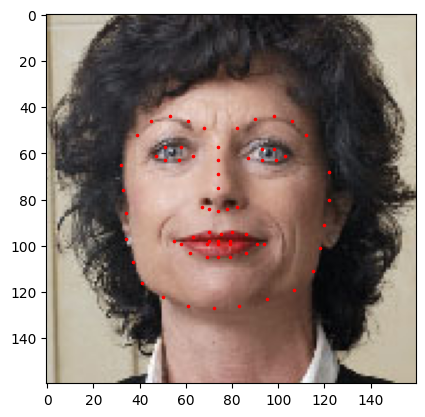

In [12]:
def show_landmarks(image, landmarks):
    """ 랜드마크와 함께 이미지 보여주기 """
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001) # 잠시 멈추어 도표가 업데이트 되게 합니다.

plt.figure()
show_landmarks(io.imread(os.path.join('faces/', img_name)),
               landmarks)
plt.show()

### 1.2 데이터셋 클래스 만들기
이제 PyTorch 데이터셋 클래스에 대해 알아봅시다.





``torch.utils.data.Dataset`` 은 추상 클래스로서 데이터셋을 맡고 있습니다
``Dataset`` 을 상속받아야 하며 다음의 메소드들을 오버라이드 해야합니다.

-  ``__len__`` 에는 ``len(dataset)`` 데이터셋의 사이즈를 반환합니다.
-  ``__getitem__`` 는 이러한 인덱싱을 지원하고 ``dataset[i]``
    $`i$` 번째 샘플을 얻기 위해 사용됩니다.

우리의 얼굴 랜드마크 데이터셋을 위한 데이터셋 클래스를 만들어 봅시다.
우리는 csv파일은 ``__init__`` 에서 읽고 이미지들은 ``__getitem__`` 에서 읽도록 남겨두겠습니다.
이러한 방법은 메모리를 효율적으로 사용하도록 하는데 그 이유는 모든 이미지를 한 번에 메모리에 저장하지 않고
필요할 때마다 불러오기 때문입니다.

우리 데이터셋의 샘플은 dict 형태로 이렇게 ``{'image': image, 'landmarks': landmarks}`` 되어있습니다.
데이터셋은 선택적 매개변수인 ``transform`` 을 가지고 있어서
필요한 프로세싱 어느것이나 샘플에 적용 될 수 있습니다.
``transform`` 이 얼마나 유용한지는 다른 레시피에서 확인 해 볼 수 있습니다.




In [13]:
class FaceLandmarksDataset(Dataset):
    """" 얼굴 랜드마크 데이터셋. """

    def __init__(self, csv_file, root_dir, transform=None):
        """
        매개변수 :
            csv_file (문자열): 설명이 포함된 csv 파일 경로.
            root_dir (문자열): 모든 이미지가 있는 폴더 경로.
            transform (호출가능한 함수, 선택적 매개변수): 샘플에 적용할 수 있는 선택적 변환.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir, self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {"image":image, "landmarks":landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

### 1.3 반복문을 통한 데이터 샘플 사용




다음으로는 이 클래스를 인스턴스화하고 데이터 샘플을 반복문을 이용하여 사용해봅시다.
우리는 첫 4개의 샘플들만 출력하고 그 4개 샘플들의 랜드마크를 보여주겠습니다.




0 (324, 215, 3) (68, 2)


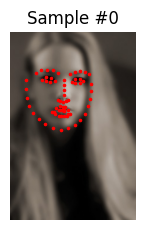

1 (500, 333, 3) (68, 2)


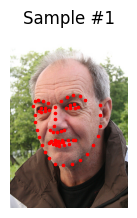

2 (250, 258, 3) (68, 2)


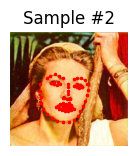

3 (434, 290, 3) (68, 2)


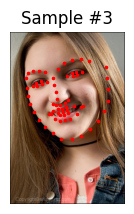

In [14]:
face_dataset = FaceLandmarksDataset(csv_file="faces/face_landmarks.csv", root_dir='faces/')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample["image"].shape, sample["landmarks"].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

## 두 번째: 데이터 변형




우리는 지금까지 어느정도 사용자 정의 데이터셋을 만들어 보았는데 이제는 사용자 정의 변형을 만들 차례 입니다.
컴퓨터 비전에서는 사용자 정의 변형은 알고리즘을 일반화시키고 정확도를 올리는데 도움을 줍니다.
변형들은 훈련시에 사용이 되며 주로 데이터 증강으로 참조되며 최근의 모델 개발에선 흔히 사용됩니다.

데이터셋을 다룰때 자주 일어나는 문제중 하나는 모든 샘플들이 같은 크기를 가지고 있지 않을 경우입니다.
대부분의 신경망들은 미리 정해진 크기의 이미지들을 받아들입니다.
그렇기 때문에 우리는 전처리 코드를 작성해야할 필요가 있습니다.
이제 세개의 변형을 만들어 봅시다.

-  ``Rescale``: 이미지 크기를 변경할때 사용됩니다.
-  ``RandomCrop``: 무작위로 이미지를 잘라내며 데이터 증강에 쓰입니다.
-  ``ToTensor``: Numpy 이미지들을 파이토치 이미지로 변환할때 사용됩니다. (그러기 위해서는 이미지 차원의 순서를 바꿔야합니다.)

우리는 위의 세개의 변형들을 단순한 함수 대신에 호출가능한 클래스로 만들어서 매번 변형이 호출될때 항상 매개변수가 넘겨지지 않도록 할겁니다.
그러기 위해서는 우리는 단순히 ``__call__`` 메소드를 만들고 필요하다면 ``__init__`` 를 만들면 됩니다.
그러면 우리는 변형을 이런식으로 사용할 수 있습니다.

``tsfm = Transform(params)``

``transformed_sample = tsfm(sample)``

어떻게 이런 변형들이 이미지와 랜드마크에 적용이 되었는지 아래를 봐주시길 바랍니다.




### 2.1 호출 가능한 클래스들 작성하기
각각의 변형에 맞는 호출 가능한 클래스 작성을 시작해 봅시다.





In [15]:
class Rescale(object):
    """ 주어진 크기로 샘플 안에 있는 이미지를 변환 합니다.

    Args:
        output_size (tuple 또는 int): 원하는 결과값의 크기
        tuple로 주어진다면 결과값은 output_size와 동일해야 하며
        int 일 때는 설정된 값보다 작은 이미지들의 가로와 세로는 output_size에 적절한 비율로 변환
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h 와 w 는 이미지의 랜드마크들 때문에 서로 바뀝니다.
        # x 와 y 축들은 각각 1과 0 값을 가집니다.
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image':img, 'landmarks':landmarks}

class RandomCrop(object):
    """ 샘플에 있는 이미지를 무작위로 자르기.

    Args:
        output_size (tuple 또는  int): 원하는 결과값의 크기
        int로 설정하면 정사각형 형태로 자름
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top : top + new_h, left : left + new_w]

        landmarks = landmarks - [left, top]

        return {'image':image, 'landmarks':landmarks}

class ToTensor(object):
    """ 샘플 안에 있는 n차원 배열을 Tensor로 변환."""

    def __call__(self, sample):
        image, landmarks = sample["image"], sample["landmarks"]

        # numpy와 torch의 이미지 표현방식 다름
        # numpy 이미지: H x W x C
        # torch 이미지: C X H X W
        image = image.transpose((2,0,1))
        return {"image": torch.from_numpy(image),
                "landmarks":torch.from_numpy(landmarks)}

### 2.2 변환들을 구성하고 샘플에 적용해보기.
다음에는 작성해왔던 변환들을 구성하고 샘플에 적용해봅시다.


우리가 한 이미지의 가로나 세로중에서 더작은 쪽을 256으로 크기를 바꾸고싶고
바뀐 이미지에서 무작위하게 가로 세로 전부 224로 자르고 싶다고 상황을 가정해봅시다.
예를들면, 우리는 ``Rescale`` 과 ``RandomCrop`` 변환을 구성해야 합니다.
``torchvision.transforms.Compose`` 는 간단한 호출가능한 클래스로 이러한것들을 우리에게 가능하게 해줍니다.




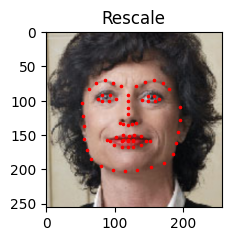

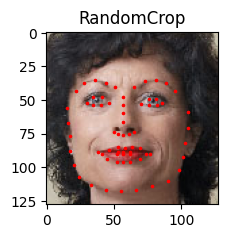

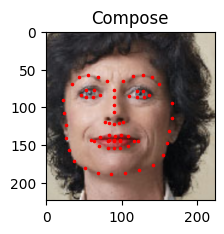

In [16]:
scale = Rescale(256)
crop = RandomCrop(128)
composed = transforms.Compose([Rescale(256), RandomCrop(224)])

# 위에 있는 변환들을 각각 샘플에 적용
fig = plt.figure()
sample = face_dataset[65]
for i, tsfm in enumerate([scale, crop, composed]):
    transformed_sample = tsfm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

### 2.3 데이터셋을 반복문을 통해 사용하기
다음으로 우리는 데이터셋을 반복문을 통해 사용해보도록 하겠습니다.


이제 이 모든것을 다 꺼내어서 변환을 구성하고 데이터셋을 만들어봅시다.
요약하자면 항상 이 데이터셋을 다음과 같이 불러와집니다.

-  이미지는 읽으려고 할때마다 불러옵니다.
-  변형들은 읽은 이미지에 적용이 됩니다.
-  변형들중 하나는 무작위를 이용하기 때문에, 데이터는 샘플링에 따라 증강됩니다.

저번에 해본것처럼 생성된 데이터셋을 ``for i in range`` 이라는 반복문을 통해 사용할 수 있습니다.




In [17]:
transformed_dataset = FaceLandmarksDataset(csv_file="faces/face_landmarks.csv",
                                           root_dir='faces/',
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               RandomCrop(224),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        break

0 torch.Size([3, 224, 224]) torch.Size([68, 2])
1 torch.Size([3, 224, 224]) torch.Size([68, 2])
2 torch.Size([3, 224, 224]) torch.Size([68, 2])
3 torch.Size([3, 224, 224]) torch.Size([68, 2])


직접적으로 데이터셋을 ``for``  반복문으로 데이터를 이용하는건 많은 특성들을 놓칠 수 밖에 없습니다.
특히, 우리는 다음과 같은 특성들을 놓친다고 할 수 있습니다.

-  데이터 배치
-  데이터 섞기
-  ``multiprocessing`` 를 이용하여 병렬적으로 데이터 불러오기

``torch.utils.data.DataLoader`` 는 반복자로서 위에 나와있는 모든 특성들을 제공합니다.
아래에 제시된 사용되는 매개변수들은 쉽게 이해가 될겁니다. 흥미로운 매개변수는 ``collate_fn`` 인데
이것은 정확하게 ``collate_fn`` 을 통해 몇개의 샘플들이 배치가 되어야하는지 지정할 수 있습니다.
하지만 굳이 수정하지 않아도 대부분의 경우에는 잘 작동할겁니다.




0 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
1 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
2 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
3 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])


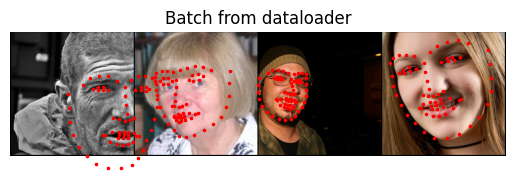

In [19]:
dataloader = DataLoader(transformed_dataset, batch_size=4, shuffle=True, num_workers=4)

# 배치를 보여주기 위한 도움 함수
def show_landmarks_batch(sample_batched):
    """ 샘플들의 배치에서 이미지와 함께 랜드마크를 보여줌. """
    images_batch, landmarks_batch = \
        sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1,2,0)))

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size, landmarks_batch[i, :, 1].numpy(), s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['landmarks'].size())

    # 4번째 배치를 보여주고 반복문을 멈춥니다.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break